In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd

In [28]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlite3
conn = sqlite3.connect("hawaii.sqlite")
cur = conn.cursor()

In [31]:
cur.execute("Select sql from sqlite_master where type='table'")
rows = cur.fetchall()
for row in rows:
    print(row)

('CREATE TABLE measurement (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tdate TEXT, \n\tprcp FLOAT, \n\ttobs FLOAT, \n\tPRIMARY KEY (id)\n)',)
('CREATE TABLE station (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tname TEXT, \n\tlatitude FLOAT, \n\tlongitude FLOAT, \n\televation FLOAT, \n\tPRIMARY KEY (id)\n)',)


0        0.08
1        0.00
2        0.00
3        0.00
4         NaN
5        0.06
6        0.00
7        0.00
8        0.00
9        0.01
10       0.00
11       0.00
12       0.00
13       0.00
14       0.00
15       0.00
16       0.00
17       0.00
18       0.00
19       0.00
20       0.00
21       0.01
22       0.00
23       0.04
24       0.12
25       0.00
26        NaN
27       0.03
28       0.01
29        NaN
         ... 
19520    0.84
19521    0.30
19522    0.30
19523    0.00
19524    0.40
19525    0.30
19526    0.30
19527    0.00
19528     NaN
19529    0.25
19530    0.06
19531     NaN
19532     NaN
19533    0.05
19534    0.34
19535    0.15
19536    0.07
19537     NaN
19538    0.14
19539     NaN
19540    0.22
19541    0.42
19542    0.42
19543    0.13
19544     NaN
19545    0.09
19546     NaN
19547    0.56
19548    0.50
19549    0.45
Name: prcp, Length: 19550, dtype: float64

datetime.date(2010, 1, 7)

# Exploratory Climate Analysis

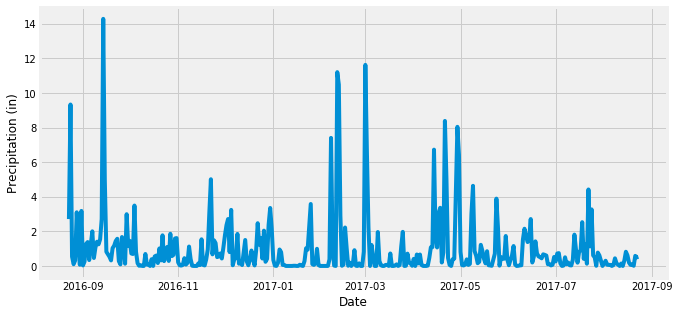

In [6]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp12 = pd.read_sql_query("Select date,prcp from measurement",conn)
datelist=[]
prcp12 = prcp12.dropna()
prcp12 = prcp12.reset_index()
for thing in prcp12["date"]:
    adate = dt.datetime.strptime(thing, "%Y-%m-%d").date()
    datelist.append(adate)
prcp12["date"]=datelist
# Calculate the date 1 year ago from the last data point in the database
lastdate=max(datelist)
yearago = lastdate - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
lengtharray = np.arange(0,len(prcp12["date"]),1)
xlist = []
ylist=[]
for item in lengtharray:
    if prcp12["date"][item] >= yearago:
        xlist.append(prcp12["date"][item])
        ylist.append(prcp12["prcp"][item])     
# Save the query results as a Pandas DataFrame and set the index to the date column
data = {"Date":xlist,"Precipitation(in)":ylist}
raindf = pd.DataFrame(data)
raindf = raindf.set_index("Date")

# Sort the dataframe by date
raindf = raindf.sort_values(by="Date",ascending=True)
raingroup = raindf.groupby(by="Date")
totalrain = raingroup["Precipitation(in)"].sum()
totalrain = pd.DataFrame(totalrain)
totalrain.head()
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,5))
plt.plot(totalrain.index,totalrain["Precipitation(in)"])
plt.xlabel("Date")
plt.ylabel("Precipitation (in)")
plt.savefig("1YearPrecipitation.jpg") 

![precipitation](Images/precipitation.png)

In [7]:
# Use Pandas to calcualte the summary statistics for the precipitation data

data = {"index":["count","mean","std","min","25%","50%","75%","max"]}
count = len(prcp12["prcp"])
mean = np.mean(prcp12["prcp"])
std = np.std(prcp12["prcp"])
quart = np.percentile(prcp12["prcp"],25)
half = np.percentile(prcp12["prcp"],50)
threequart = np.percentile(prcp12["prcp"],75)
low = min(prcp12["prcp"])
high = max(prcp12["prcp"])
data["preciptiation"]=[count,mean,std,low,quart,half,threequart,high]
sumdf = pd.DataFrame(data)
sumdf = sumdf.set_index("index")
sumdf

,preciptiation
index,
count,18103.000000
mean,0.160644
std,0.468733
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


![describe](Images/describe.png)

In [9]:
# Design a query to show how many stations are available in this dataset?
stationdf = pd.read_sql_query("Select * from station",conn)
numberofstations = stationdf["id"].nunique()
numberofstations

9

In [10]:
# What are the most active stations? (i.e. what stations have the most rows)?
measurementdf = pd.read_sql_query("Select * from measurement",conn)
# List the stations and the counts in descending order.
stationactivity = measurementdf.groupby("station").count()
stationactivity = stationactivity.sort_values("id",ascending=False)
mostactivestation = stationactivity.index.values[0]
mostactivestation

'USC00519281'

In [11]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station = [mostactivestation]
stationdata= pd.read_sql_query("Select min(prcp) as Minimum,max(prcp) as Maximum,avg(prcp) as Average from measurement m where m.station == '{}'".format(mostactivestation),conn)
stationdata["Station"] = station
stationdata = stationdata.set_index("Station")
stationdata

,Minimum,Maximum,Average
Station,,,
USC00519281,0.0,9.64,0.212352


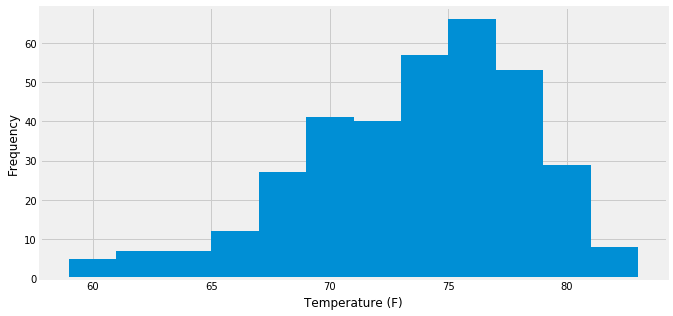

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = pd.read_sql_query("Select date,station,tobs from measurement",conn)
datelist=[]
tobs = tobs.dropna()
tobs = tobs.reset_index()
for thing in tobs["date"]:
    adate = dt.datetime.strptime(thing, "%Y-%m-%d").date()
    datelist.append(adate)
tobs["date"]=datelist

lengtharray = np.arange(0,len(tobs["date"]),1)
xlist = []
ylist=[]
zlist=[]
for item in lengtharray:
    if tobs["date"][item] >= yearago and tobs["station"][item]=="USC00519281":
        xlist.append(tobs["date"][item])
        ylist.append(tobs["tobs"][item]) 
        zlist.append(tobs["station"][item])
data = {"Date":xlist,"Temperature (F)":ylist,"Station":zlist}
yearstationdf = pd.DataFrame(data)
yearstationdf = yearstationdf.set_index("Date")

# Sort the dataframe by date
yearstationdf = yearstationdf.sort_values(by="Date",ascending=True)
plt.figure(figsize=(10,5))
plt.hist(yearstationdf["Temperature (F)"],bins=12)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.savefig("1YearStationTemperature.jpg") 
plt.show()

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [25]:
# Plot the daily normals as an area plot with `stacked=False`
import numpy as np
import pandas as pd
import datetime as dt
from flask import Flask,jsonify
import sqlite3
conn = sqlite3.connect("Resources/hawaii.sqlite")